# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import Counter
from wordcloud import WordCloud

# Data Gathering

In [2]:
# read file cvd.json in data folder
with open('../data/cvd.json') as f:
    data = json.load(f)

In [3]:
# convert json to dataframe with columns topic, subtopic_title, and content
topics = []
subtopics = []
contents = []

for item in data:
    for subtopic in item['subtopics']:
        topics.append(item['topic'])
        subtopics.append(subtopic['subtopic'])
        contents.append(subtopic['content'])

df = pd.DataFrame({'topic': topics,'subtopic': subtopics,'content': contents})
df.to_csv('data/cvd.csv', index=False)

df

OSError: Cannot save file into a non-existent directory: 'data'

# EDA

In [4]:
# String containing the Unicode escape sequence
text = "\u00e2\u0080\u009cper\u00e2\u0080\u009d"

# Decode the escaped sequence properly
decoded_text = text.encode("latin1").decode("utf-8")

print(decoded_text)

“per”


In [5]:
# String with misinterpreted encoding
text = "â"

# Fix encoding issue: Treat as Latin-1 bytes and decode as UTF-8
fixed_text = text.encode("latin1").decode("utf-8")

print(fixed_text)

–


In [6]:
df['word_count'] = df['content'].apply(lambda x: len(x.split()))

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   topic       646 non-null    object
 1   subtopic    646 non-null    object
 2   content     646 non-null    object
 3   word_count  646 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 20.3+ KB


### Jumlah Subtopik dan Panjang Konten

In [8]:
# Jumlah topik dalam dataset
df['topic'].nunique()

45

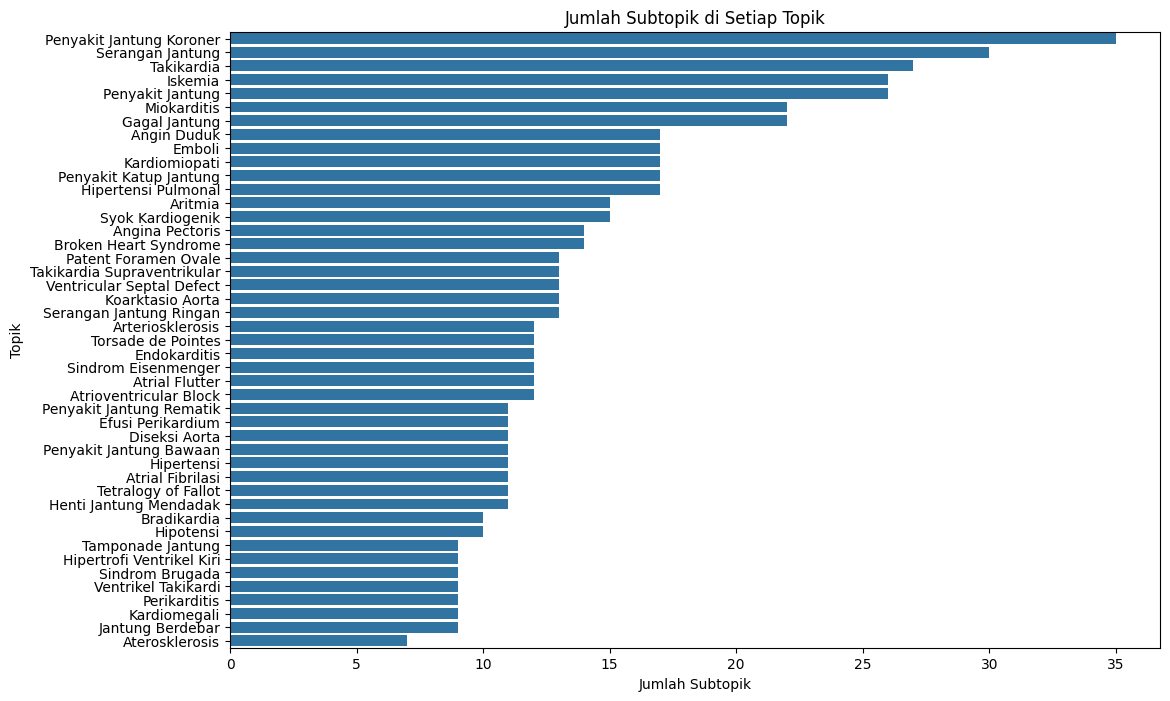

In [9]:
# Visualisasi jumlah subtopik
plt.figure(figsize=(12,8))
sns.countplot(y='topic', data=df, order = df['topic'].value_counts().index)

plt.xlabel('Jumlah Subtopik')
plt.ylabel('Topik')

plt.title('Jumlah Subtopik di Setiap Topik')
plt.show()

### Panjang Kalimat di Setiap Konten

In [10]:
df['word_count'].describe()

count    646.000000
mean      80.099071
std       55.505928
min        8.000000
25%       38.250000
50%       67.000000
75%      102.500000
max      376.000000
Name: word_count, dtype: float64

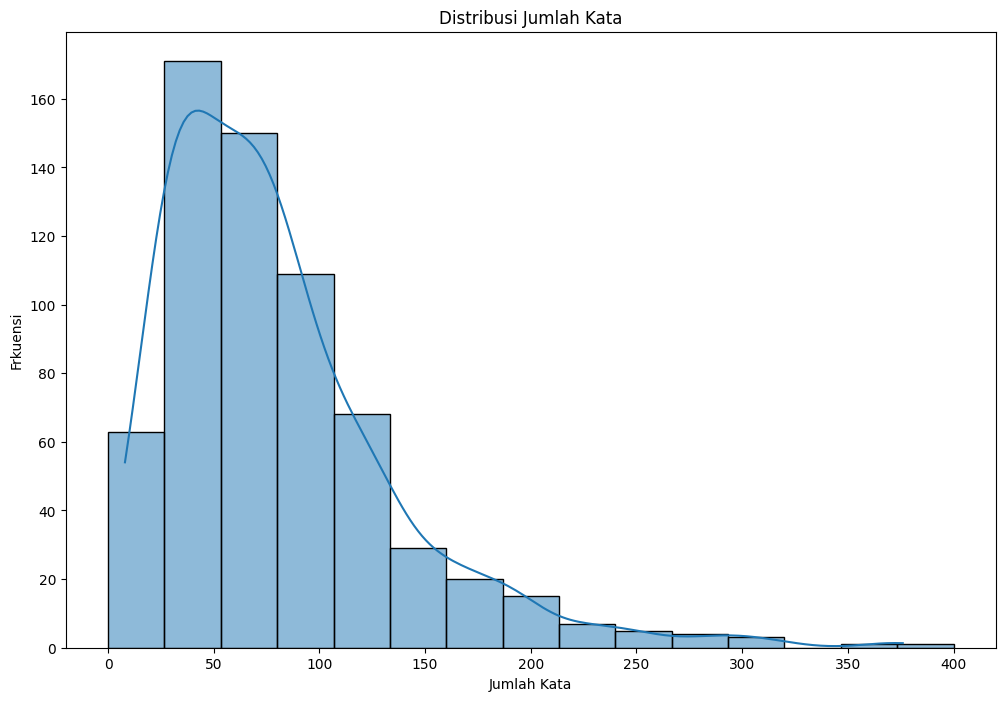

In [11]:
plt.figure(figsize=(12,8))
sns.histplot(df['word_count'], binrange=(0,400),bins=15, kde=True)
plt.xlabel('Jumlah Kata')
plt.ylabel('Frkuensi')
plt.title('Distribusi Jumlah Kata')
plt.show()

Text(0.5, 1.0, 'Boxplot Jumlah Kata')

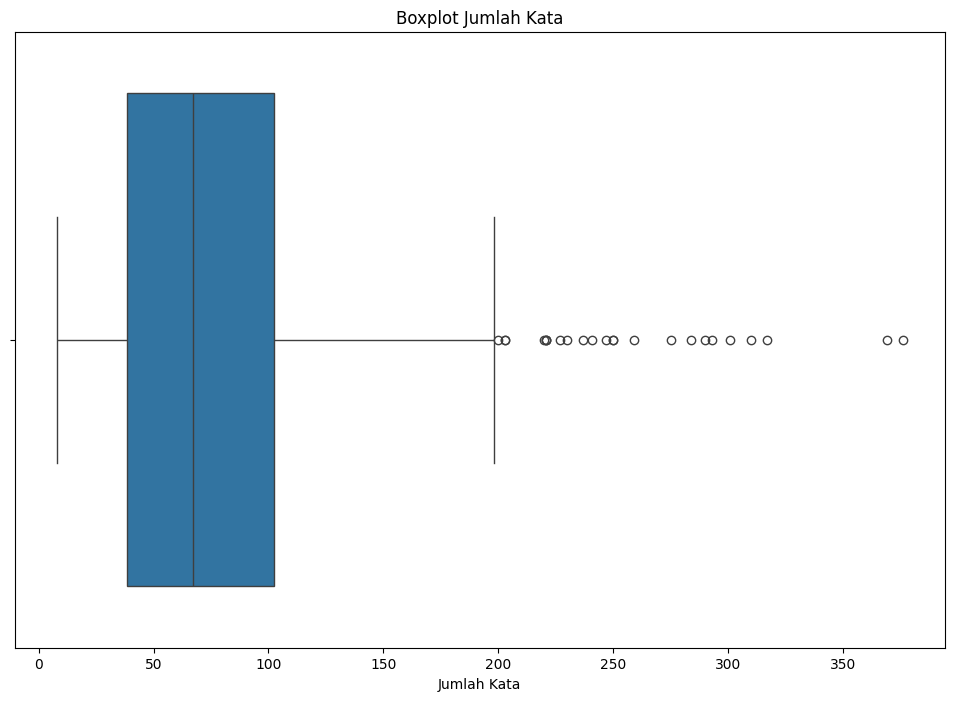

In [12]:
plt.figure(figsize=(12,8))
sns.boxplot(df['word_count'], orient='h')
plt.xlabel('Jumlah Kata')
plt.title('Boxplot Jumlah Kata')

Text(0.5, 1.0, 'Boxplot Jumlah Kata')

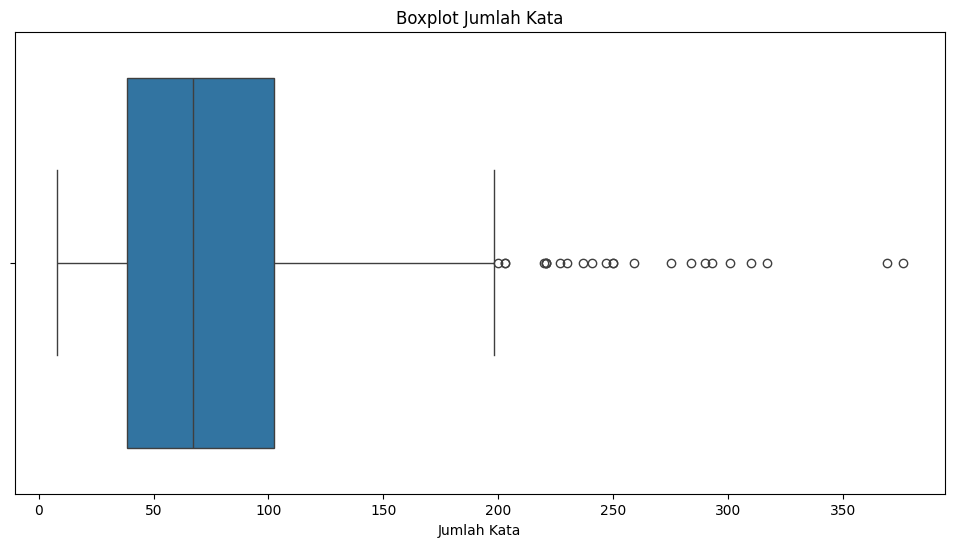

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(df['word_count'], orient='h')
plt.xlabel('Jumlah Kata')
plt.title('Boxplot Jumlah Kata')

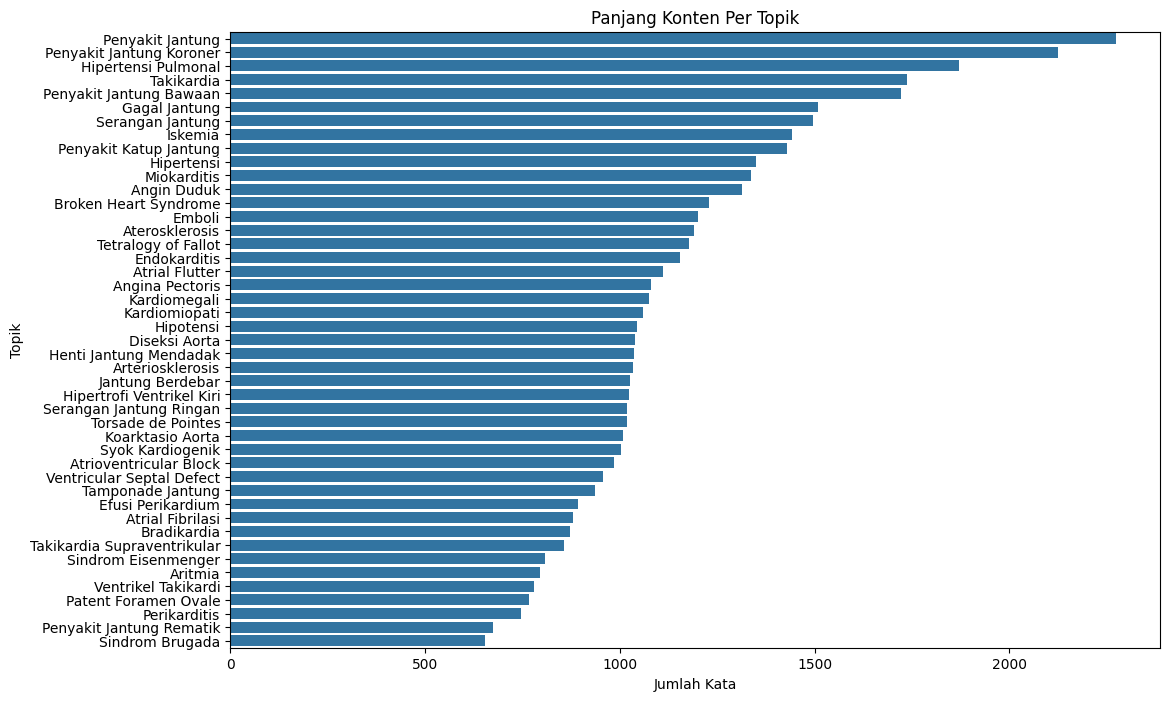

In [14]:
# Visualisasi panjang konten per topik
plt.figure(figsize=(12,8))
sns.barplot(x='word_count', y='topic', data=df, estimator=sum, errorbar=None, order=df.groupby('topic')['word_count'].sum().sort_values(ascending=False).index)

plt.xlabel('Jumlah Kata')
plt.ylabel('Topik')
plt.title('Panjang Konten Per Topik')
plt.show()

In [15]:
q1 = df['word_count'].quantile(0.25)
q3 = df['word_count'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

df[(df['word_count'] > upper_bound) | (df['word_count'] < lower_bound)]

,topic,subtopic,content,word_count
5,Hipertensi,Diagnosis Hipertensi,"Untuk mendiagnosis hipertensi, dokter akan mel...",293
19,Penyakit Jantung,Penyebab Penyakit Jantung: Faktor Risiko Penya...,Penyakit jantung lebih berisiko terjadi pada o...,250
20,Penyakit Jantung,Gejala Penyakit Jantung,"Gejala penyakit jantung sangat beragam, tergan...",203
36,Penyakit Jantung,Pencegahan Penyakit Jantung,Penyakit jantung yang disebabkan oleh kelainan...,310
54,Gagal Jantung,Pengobatan Gagal Jantung: Obat-obatan,Obat-obatan yang diberikan oleh dokter bertuju...,221
91,Hipotensi,Penyebab Hipotensi,"Tekanan darah dapat berubah sepanjang waktu, t...",241
96,Hipotensi,Pengobatan Hipotensi,Pengobatan hipotensi tergantung pada penyebab ...,227
125,Emboli,Gejala Emboli,Gejala emboli tergantung pada jenis dan lokasi...,220
202,Jantung Berdebar,Diagnosis Jantung Berdebar,"Untuk memulai diagnosis, dokter akan melakukan...",247
212,Kardiomegali,Pengobatan Kardiomegali,Pengobatan kardiomegali berfokus untuk mengata...,301


### Frekuensi Kata dalam Konten

In [18]:
# open stopword
stopwords = pd.read_csv('../data/stopwordbahasa.csv', header=None)
stopwords.columns = ['stopword']

stopwords.head(5)

,stopword
0,ada
1,adalah
2,adanya
3,adapun
4,agak


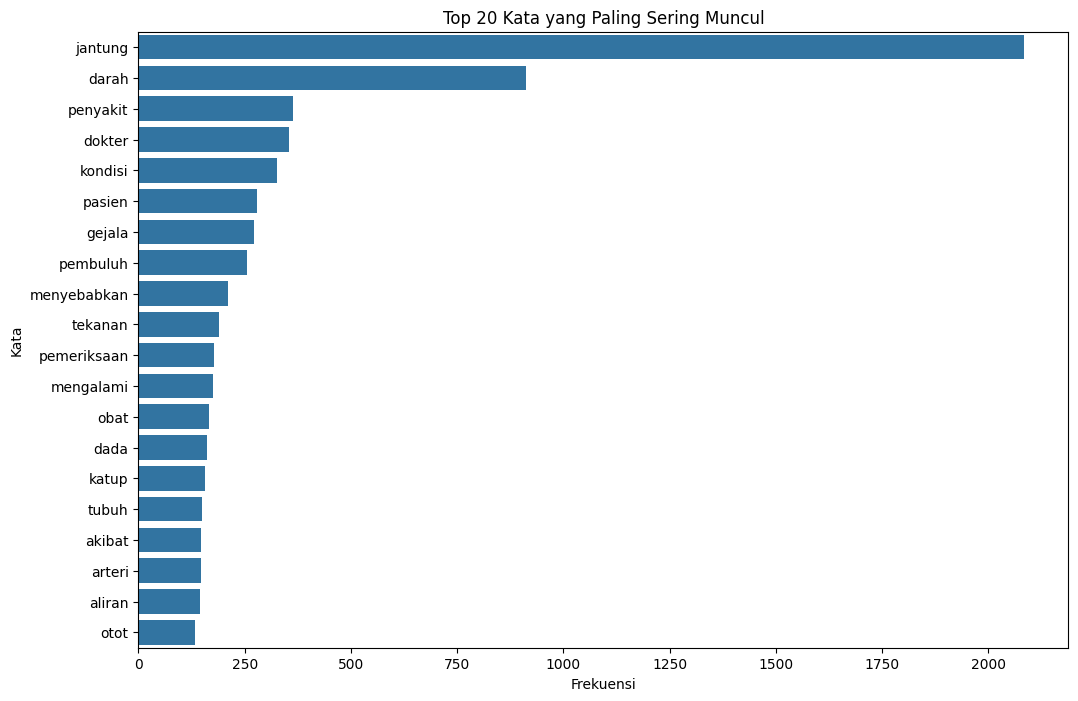

In [19]:
words = df['content'].str.split(' ').explode().tolist()  
punctuations = ['.', ',', '?', '!', '\n','-',':',';']
for p in punctuations:
    words = [word.replace(p, '') for word in words]

word_count = Counter(words)

word_count.pop('', None)
for word in stopwords['stopword']:
    word_count.pop(word, None)
top_20_words = word_count.most_common(20)

# plot top 20 words
plt.figure(figsize=(12,8))
sns.barplot(x=[word[1] for word in top_20_words], y=[word[0] for word in top_20_words])
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.title('Top 20 Kata yang Paling Sering Muncul')
plt.show()


In [20]:
top_20_words

[('jantung', 2084),
 ('darah', 913),
 ('penyakit', 363),
 ('dokter', 355),
 ('kondisi', 326),
 ('pasien', 279),
 ('gejala', 272),
 ('pembuluh', 255),
 ('menyebabkan', 211),
 ('tekanan', 189),
 ('pemeriksaan', 179),
 ('mengalami', 176),
 ('obat', 167),
 ('dada', 162),
 ('katup', 157),
 ('tubuh', 149),
 ('akibat', 148),
 ('arteri', 147),
 ('aliran', 146),
 ('otot', 134)]

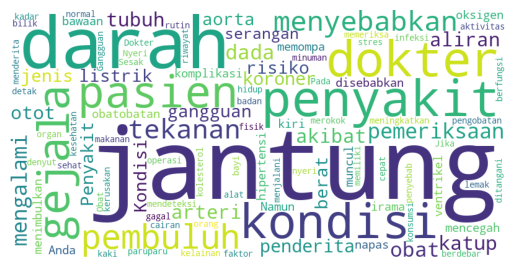

In [21]:
wordcloud = WordCloud(width=800, height=400, background_color='white', min_font_size=12).generate_from_frequencies(word_count)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [22]:
# count the frequency of unicode characters in the dataset
# make a dict of the frequency of the unicode characters
unicode_count = {}

df['combined_content'] = df['topic'] + df['subtopic'] + df['content']
for index, row in df.iterrows():
    for char in row['combined_content']:
        if ord(char) > 127:
            if char in unicode_count:
                unicode_count[char] += 1
            else:
                unicode_count[char] = 1

# sort the dict by the frequency of the unicode characters
sorted_unicode_count = dict(sorted(unicode_count.items(), key=lambda item: item[1], reverse=True))

sorted_unicode_count

{'Â': 358,
 '\xa0': 276,
 'â': 57,
 '\x80': 50,
 '\x93': 41,
 '\x99': 5,
 'Ã': 5,
 '¶': 5,
 '\x89': 4,
 '¥': 4,
 '\x88': 3,
 '\x92': 3,
 '\x9c': 2,
 '\x9d': 2,
 'ê': 2,
 '\x9f': 2,
 '·': 2,
 '–': 1}

# Data Preparation

In [254]:
df_prepared = df.copy()

for index, row in df_prepared.iterrows():
    try:
        topic = row['topic'].encode("latin1").decode("utf-8")
    except:
        topic = row['topic'].replace('\u00a0', ' ')
    try:
        subtopic = row['subtopic'].encode("latin1").decode("utf-8")
    except:
        subtopic = row['subtopic'].replace('\u00a0', ' ')
    try:
        content = row['content'].encode("latin1").decode("utf-8")
    except:
        content = row['content'].replace('\u00a0', ' ')
    # print(row['content'])
    # content = row['content'].replace('\u00a0', '').encode("latin1").decode("utf-8")
    df_prepared.loc[index, 'topic'] = topic
    df_prepared.loc[index, 'subtopic'] = subtopic
    df_prepared.loc[index, 'content'] = content

In [256]:
df_prepared.iloc[0]['content']

'Hipertensi atau darah tinggi adalah kondisi ketika tekanan darah berada pada angka 130/80 mmHg atau lebih. Jika tidak segera ditangani, hipertensi bisa menyebabkan komplikasi serius, seperti gagal jantung, penyakit ginjal, hingga stroke.\nTekanan darah dinyatakan dalam dua nilai angka yang dipisahkan dengan garis miring atau yang biasanya disebut “per”. Angka di awal, yaitu di sebelah kiri garis miring menandakan tekanan sistolik. Ini adalah tekanan di dalam pembuluh darah ketika jantung berkontraksi untuk memompa darah keluar dari jantung.\n\nAngka di akhir yang berada setelah garis miring menandakan tekanan diastolik, yaitu tekanan darah saat jantung berelaksasi dan menyedot atau menerima darah masuk kembali ke dalam jantung.\nPada kondisi normal, tekanan darah orang dewasa adalah 120/80 mmHg. Artinya, tekanan sistoliknya adalah 120 mmHg dan diastoliknya 80 mmHG.\nTekanan darah tinggi yang terjadi terus-menerus dapat membuat jantung bekerja lebih keras untuk memompa darah ke seluruh